In [1]:
import numpy as np
import pandas as pd
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 500)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score

In [2]:
df = pd.read_csv('E:/loan/loan.csv')

C:\Users\AADHI\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(887379, 74)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

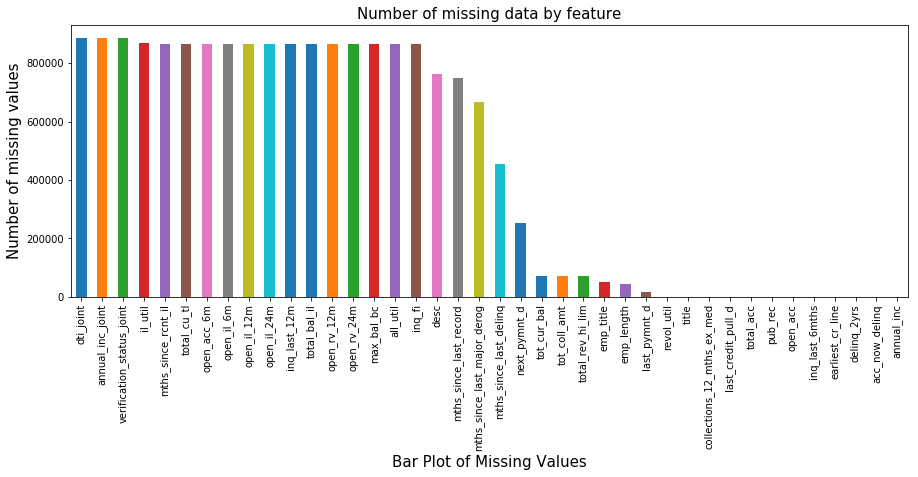

In [5]:
plt.figure(figsize=(15,5))
missing= df.isnull().sum()
missing= missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Bar Plot of Missing Values", fontsize=15)
plt.ylabel("Number of missing values", fontsize=15)
plt.title("Number of missing data by feature", fontsize=15)
missing.plot(kind="bar")

plt.show()

In [6]:
total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(25)

,Total,Percent
dti_joint,886870,99.942640
verification_status_joint,886868,99.942415
annual_inc_joint,886868,99.942415
il_util,868762,97.902024
mths_since_rcnt_il,866569,97.654892
all_util,866007,97.591559
max_bal_bc,866007,97.591559
open_rv_24m,866007,97.591559
open_rv_12m,866007,97.591559
total_cu_tl,866007,97.591559


In [7]:
Data = pd.concat([df.title, df.purpose],axis=1, keys=["title", "purpose"])
Data.head(25)

,title,purpose
0,Computer,credit_card
1,bike,car
2,real estate business,small_business
3,personel,other
4,Personal,other
5,My wedding loan I promise to pay back,wedding
6,Loan,debt_consolidation
7,Car Downpayment,car
8,Expand Business & Buy Debt Portfolio,small_business
9,Building my credit history.,other


In [8]:
# Any variable having missing values more than 50 percent are removed
df.drop(["dti_joint", "verification_status_joint", "annual_inc_joint", "il_util", "mths_since_rcnt_il",
            "all_util", "max_bal_bc", "open_rv_24m", "open_rv_12m", "total_cu_tl", "total_bal_il", "open_il_24m",
            "open_il_12m", "total_cu_tl", "total_bal_il", "open_il_24m", "open_il_12m", "open_il_6m", "open_acc_6m",
            "inq_fi", "inq_last_12m", "desc", "mths_since_last_record", "mths_since_last_major_derog",
            "mths_since_last_delinq", "next_pymnt_d", "total_rev_hi_lim", "tot_cur_bal", "tot_coll_amt"], axis=1,
           inplace=True)

# Delete unwanted columns
df.drop(["id", "url", "member_id"], axis=1, inplace=True)

# Payment plan has all the values "n" and only 3 values "y" so it is not important
df.drop(["pymnt_plan"], axis=1, inplace=True)

# Since we have both address state and zip code let's drop zip code and use address state only
df.drop(["zip_code"], axis=1, inplace=True)

# Title is not important instead we will use "purpose" variable
df.drop(["title"], axis=1, inplace=True)

# The grade is implied by the subgrade, so let's drop the grade column.
df.drop(["grade"], axis=1, inplace=True)

In [9]:
total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(25)

,Total,Percent
emp_title,51462,5.799326
emp_length,44825,5.051393
last_pymnt_d,17659,1.990018
revol_util,502,0.056571
collections_12_mths_ex_med,145,0.016340
last_credit_pull_d,53,0.005973
acc_now_delinq,29,0.003268
total_acc,29,0.003268
delinq_2yrs,29,0.003268
earliest_cr_line,29,0.003268


In [10]:
# remove "months" from "36 months" and convert it to int type
df["term"]= df['term'].map(lambda x: x.rstrip('months'))
df["term"]= df["term"].astype("int")

Text(0,0.5,'Loan Amount')

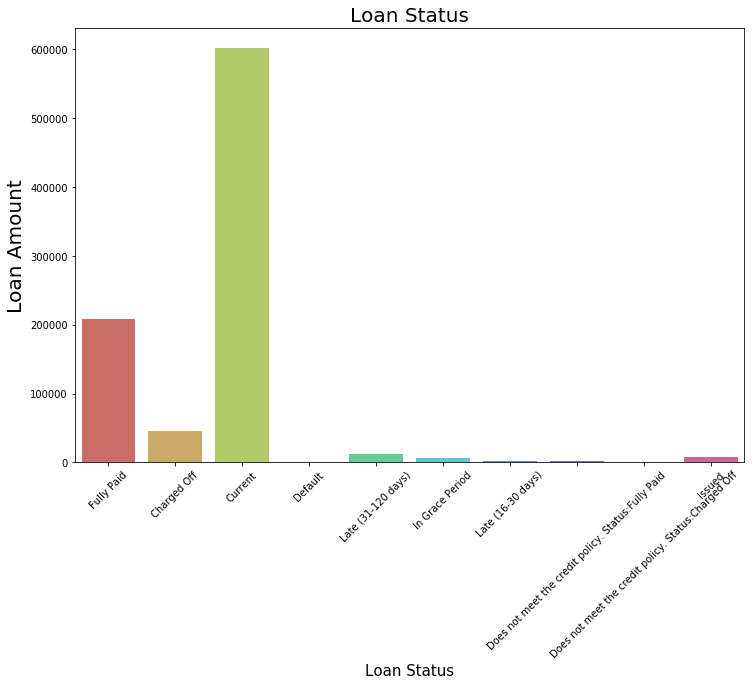

In [11]:
# Loan Status
plt.figure(figsize = (12,8))
g = sns.countplot(x="loan_status",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Loan Status", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=20)

In [12]:
#Removing Issued from loan status
df = df.drop(df[df.loan_status =='Issued'].index)

In [13]:
df.shape

(878919, 42)

In [14]:
df["emp_title"]= df["emp_title"].fillna("Not_specified")
print("Not_specified")

Not_specified


In [17]:
df = df.drop(df[df['annual_inc'].isna() ==True].index)
df = df.drop(df[df.annual_inc ==0].index)

In [83]:
df['annual_inc'].isin([0]).any().any()

KeyError: 'annual_inc'

In [18]:
df = df.drop(df[df['acc_now_delinq'].isna() ==True].index)

In [20]:
df["emp_length"]= df['emp_length'].fillna("Not_specified")
print("Not_specified")

Not_specified


In [21]:
df["last_pymnt_d"]= pd.to_datetime(df["last_pymnt_d"])
df["last_pymnt_d"]= df["last_pymnt_d"].fillna(df["last_pymnt_d"].mode()[0])
print(df["last_pymnt_d"].mode())

0   2016-01-01
dtype: datetime64[ns]


In [23]:
df["revol_util"]= df["revol_util"].fillna(df["revol_util"].median())
print(df["revol_util"].median())

56.0


In [25]:
df["purpose"]= df["purpose"].fillna("Not_specified")
print("Not_specified")

Not_specified


In [26]:
df["collections_12_mths_ex_med"]= df["collections_12_mths_ex_med"].fillna(df["collections_12_mths_ex_med"].mode()[0])
print(df["collections_12_mths_ex_med"].mode())

0    0.0
dtype: float64


In [27]:
df["last_credit_pull_d"]= pd.to_datetime(df["last_credit_pull_d"])
df["last_credit_pull_d"]= df["last_credit_pull_d"].fillna(df["last_credit_pull_d"].mode()[0])
print(df["last_credit_pull_d"].mode())

0   2016-01-01
dtype: datetime64[ns]


In [28]:
df["total_acc"]= df["total_acc"].fillna(df["total_acc"].median())
print(df["total_acc"].median())

24.0


In [29]:
df["open_acc"]= df["open_acc"].fillna(df["open_acc"].median())
print(df["open_acc"].median())

11.0


In [30]:
df["earliest_cr_line"]= pd.to_datetime(df["earliest_cr_line"])
df["earliest_cr_line"]= df["earliest_cr_line"].fillna(df["earliest_cr_line"].mode()[0])
print(df["earliest_cr_line"].mode())

0   2001-08-01
dtype: datetime64[ns]


In [31]:
df["inq_last_6mths"]= df["inq_last_6mths"].fillna(df["inq_last_6mths"].mode()[0])
print(df["inq_last_6mths"].mode())

0    0.0
dtype: float64


In [32]:
df["pub_rec"]= df["pub_rec"].fillna(df["pub_rec"].mode()[0])
print(df["pub_rec"].mode())

0    0.0
dtype: float64


In [33]:
df["delinq_2yrs"]= df["delinq_2yrs"].fillna(df["delinq_2yrs"].mode()[0])
print(df["delinq_2yrs"].mode())

0    0.0
dtype: float64


In [34]:
df["earliest_cr_line"] = pd.DatetimeIndex(df["earliest_cr_line"]).month
df["last_pymnt_d"] = pd.DatetimeIndex(df["last_pymnt_d"]).month
df["last_credit_pull_d"] = pd.DatetimeIndex(df["last_credit_pull_d"]).month

In [35]:
df["loan_status"].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1962
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       758
Name: loan_status, dtype: int64

In [36]:
df["Loan_Class"] = np.where((df.loan_status == 'Current') |
                        (df.loan_status == 'Fully Paid') |
                        (df.loan_status == 'Does not meet the credit policy. Status:Fully Paid'), 0,1)

In [37]:
df.drop(['loan_status'],axis = 1,inplace = True)

C:\Users\AADHI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Loan Amount')

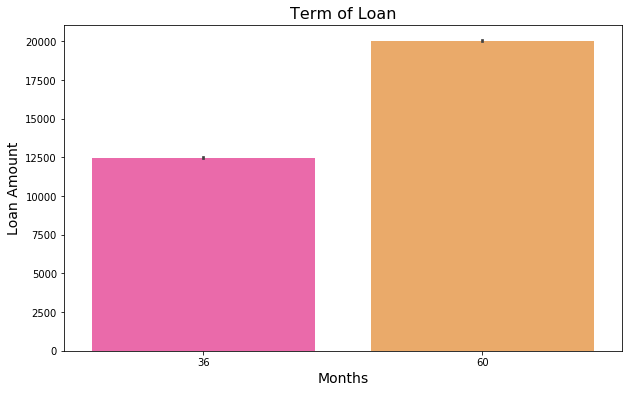

In [38]:
plt.figure(figsize=(10,6))
sns.barplot("term", "loan_amnt", data=df, palette='spring')
plt.title("Term of Loan", fontsize=16)
plt.xlabel("Months", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)

C:\Users\AADHI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Frequency Distribuition- Loan Amount')

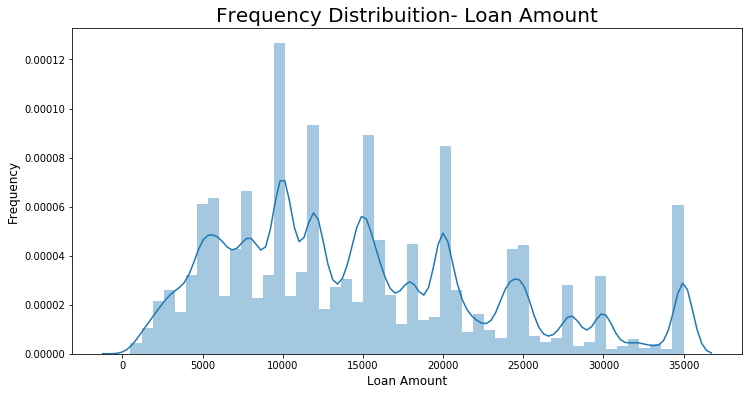

In [39]:
plt.figure(figsize=(12,6))
g = sns.distplot(df["loan_amnt"])
g.set_xlabel("Loan Amount", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Frequency Distribuition- Loan Amount", fontsize=20)

C:\Users\AADHI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Int Rate Distribuition')

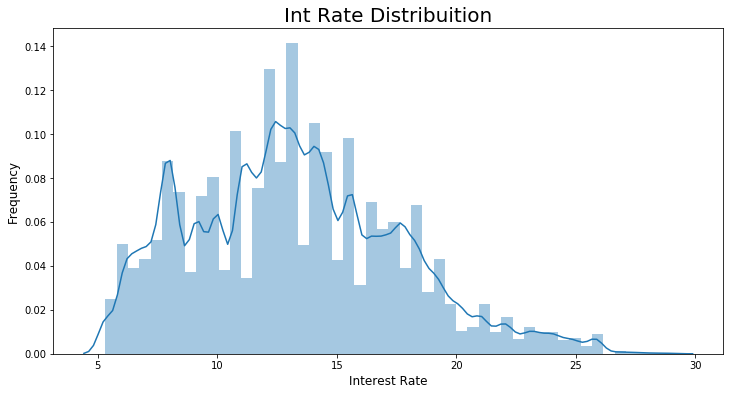

In [40]:
plt.figure(figsize=(12,6))
g = sns.distplot(df["int_rate"])
g.set_xlabel("Interest Rate", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Int Rate Distribuition", fontsize=20)

Text(0,0.5,'Loan Amount')

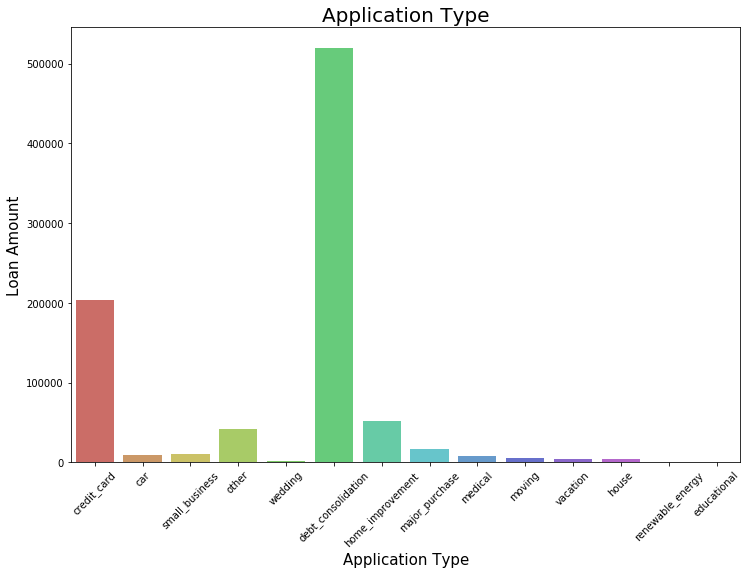

In [41]:
plt.figure(figsize = (12,8))
g = sns.countplot(x="purpose",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Application Type", fontsize=20)
g.set_xlabel("Application Type", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

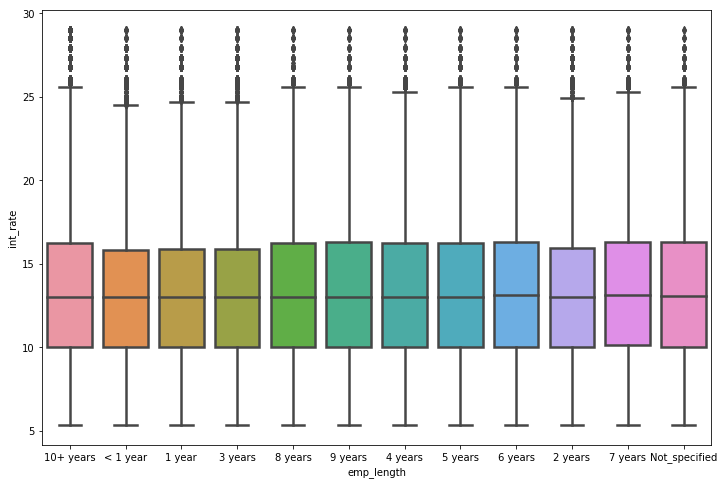

In [42]:
plt.figure(figsize = (12,8))
ax = sns.boxplot(x="emp_length" ,y= "int_rate", data=df, linewidth=2.5)

plt.show()

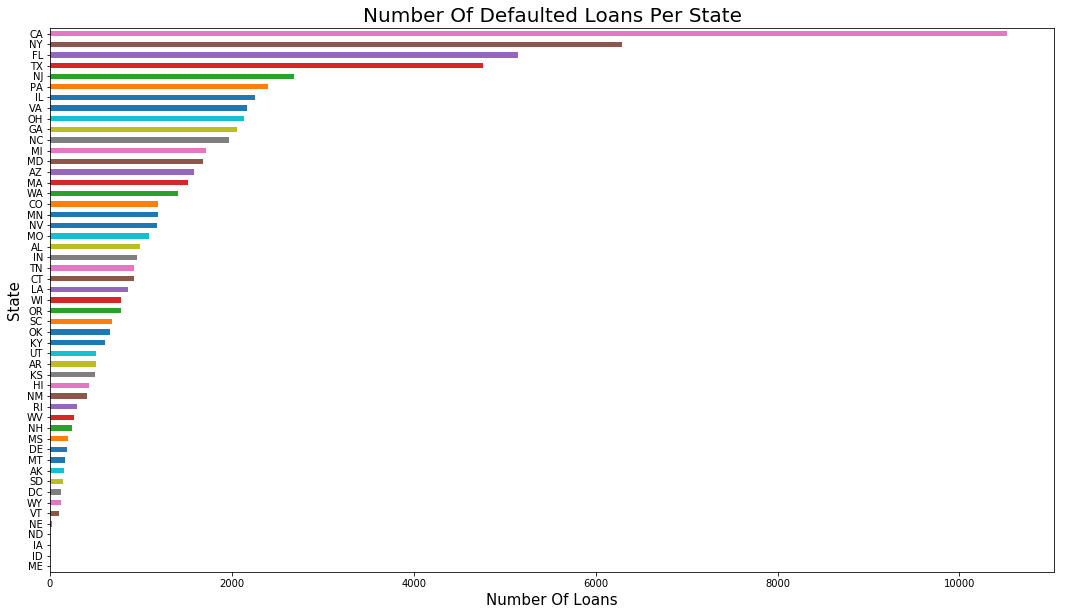

In [43]:
fig = plt.figure(figsize=(18,10))
df[df['Loan_Class']==1].groupby('addr_state')['Loan_Class'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number Of Loans',fontsize=15)
plt.title('Number Of Defaulted Loans Per State',fontsize=20);

Loan Amount Distribution BoxPlot


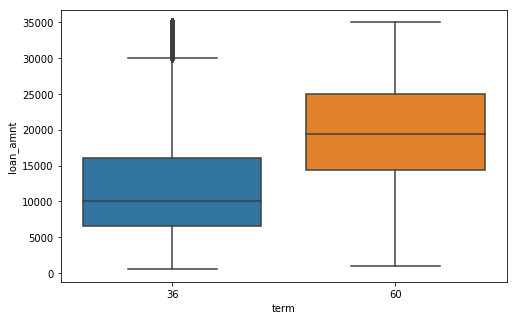

In [44]:
print("Loan Amount Distribution BoxPlot")
plt.figure(figsize=(8,5))
sns.boxplot(x=df.term, y=df.loan_amnt)

Text(0,0.5,'Loan Amount')

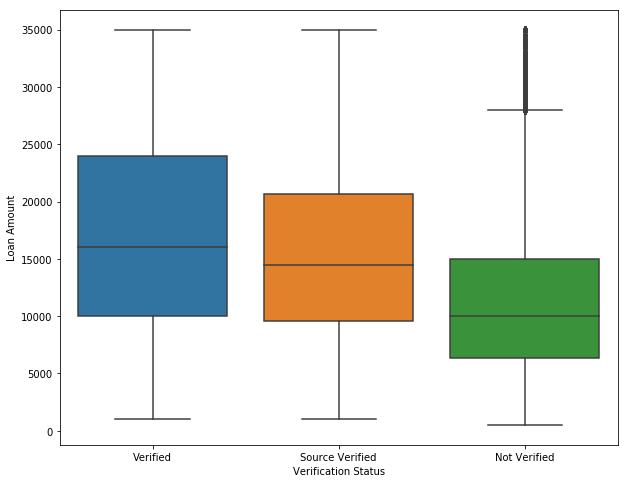

In [45]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df.verification_status, y=df.loan_amnt)
plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")

In [46]:
correlation_m = df.corr()
correlation_m["Loan_Class"].sort_values(ascending=False)

Loan_Class                    1.000000
recoveries                    0.390700
collection_recovery_fee       0.269518
last_pymnt_d                  0.176835
int_rate                      0.175865
total_rec_late_fee            0.166211
last_credit_pull_d            0.119823
inq_last_6mths                0.081096
total_rec_int                 0.065008
revol_util                    0.049966
term                          0.039755
installment                   0.014344
dti                           0.010189
loan_amnt                     0.003716
funded_amnt                   0.003013
delinq_2yrs                   0.002942
funded_amnt_inv               0.000208
acc_now_delinq               -0.000039
earliest_cr_line             -0.003071
collections_12_mths_ex_med   -0.006699
pub_rec                      -0.013397
open_acc                     -0.015824
total_acc                    -0.017944
revol_bal                    -0.020702
annual_inc                   -0.034177
total_pymnt              

Text(0,0.5,'Frequency')

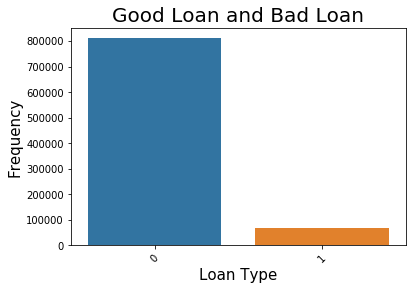

In [47]:
g= sns.countplot(df["Loan_Class"])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Good Loan and Bad Loan", fontsize=20)
g.set_xlabel("Loan Type", fontsize=15)
g.set_ylabel("Frequency", fontsize=15)

In [48]:
cols= ['sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'purpose', 'addr_state',
       'initial_list_status', 'application_type']

for i in cols:
    lbl= LabelEncoder()
    lbl.fit(list(df[i].values))
    df[i]= lbl.transform(list(df[i].values))

In [49]:
X = df.ix[:, df.columns != "Loan_Class"]
y = df["Loan_Class"]

C:\Users\AADHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [50]:
df.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_re

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [52]:
vif.round(1)

,VIF Factor,features
0,6.851000e+02,loan_amnt
1,2.372200e+03,funded_amnt
2,1.628800e+03,funded_amnt_inv
3,7.700000e+00,term
4,3.270000e+01,int_rate
5,5.150000e+01,installment
6,3.220000e+01,sub_grade
7,1.000000e+00,emp_title
8,1.000000e+00,emp_length
9,1.100000e+00,home_ownership


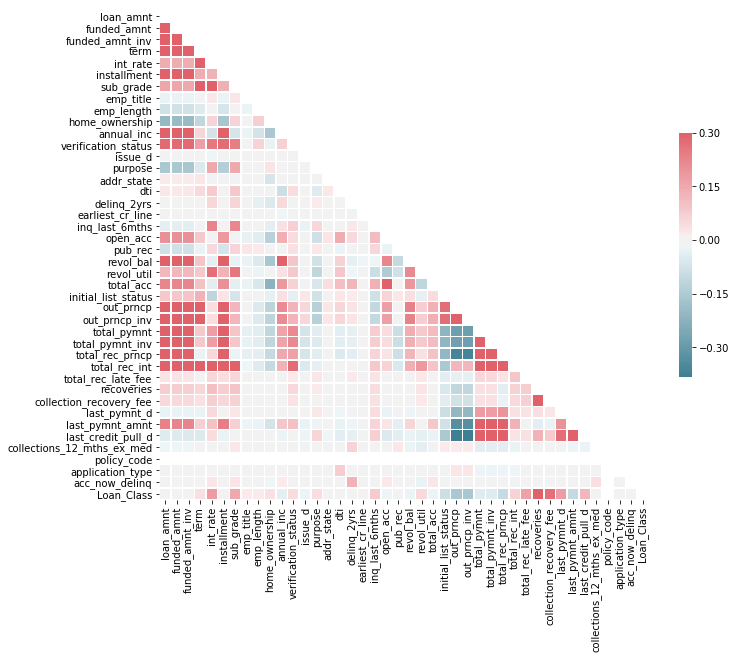

In [53]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [54]:
#Features that are not so important for our prediction
df.drop(['recoveries','policy_code','sub_grade','funded_amnt','funded_amnt_inv','out_prncp_inv','total_pymnt_inv',
        'total_rec_int','last_pymnt_d','last_pymnt_amnt','total_rec_prncp','total_rec_late_fee','collection_recovery_fee',
        'inq_last_6mths','collections_12_mths_ex_med','initial_list_status'],axis = 1,inplace = True)

In [55]:
df['annual_inc'].head()

0    24000.0
1    30000.0
2    12252.0
3    49200.0
4    80000.0
Name: annual_inc, dtype: float64

In [56]:
df["term"].head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int32

In [57]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'total_pymnt', 'last_credit_pull_d',
       'application_type', 'acc_now_delinq', 'Loan_Class'],
      dtype='object')

In [58]:
df = df.rename(columns={'installment': 'EMI', 'emp_length': 'No._of_yrs_employed','issue_d':'Month_of_Funding',
                       'open_acc':'No._open_creditlines','pub_rec':'derogatory_pub_recs','total_acc':"total_active_credit"})

#proc

In [59]:
df["Term_yrs"] = df["term"]/12

In [60]:
df["Term_yrs"].value_counts()
df.drop(['term'],axis = 1,inplace = True)

3.0    615114
5.0    263776
Name: Term_yrs, dtype: int64

In [73]:
df["Loan_income_ratio"] = df["loan_amnt"]/df["annual_inc"]

In [74]:
df.drop(['loan_amnt','annual_inc'],axis = 1,inplace = True)

In [78]:
df['EMI_per_Year'] = df['EMI']*12
df.drop(['EMI'],axis = 1,inplace = True)

In [84]:
df['EMI_Term'] = df['EMI_per_Year']*df['Term_yrs']
df.drop(['EMI_per_Year','Term_yrs'],axis = 1,inplace = True)

In [89]:
df.drop(['revol_util'],axis = 1,inplace = True)

In [90]:
X = df.ix[:, df.columns != "Loan_Class"]
y = df["Loan_Class"]

C:\Users\AADHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [92]:
vif.round(1)

,VIF Factor,features
0,13.2,int_rate
1,4.0,emp_title
2,2.3,No._of_yrs_employed
3,3.4,home_ownership
4,3.1,verification_status
5,4.0,Month_of_Funding
6,2.4,purpose
7,3.2,addr_state
8,7.5,dti
9,1.2,delinq_2yrs


In [104]:
df.columns

Index(['int_rate', 'emp_title', 'No._of_yrs_employed', 'home_ownership',
       'verification_status', 'Month_of_Funding', 'purpose', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'No._open_creditlines',
       'derogatory_pub_recs', 'revol_bal', 'total_active_credit', 'out_prncp',
       'total_pymnt', 'last_credit_pull_d', 'application_type',
       'acc_now_delinq', 'Loan_Class', 'Loan_income_ratio', 'EMI_Term'],
      dtype='object')

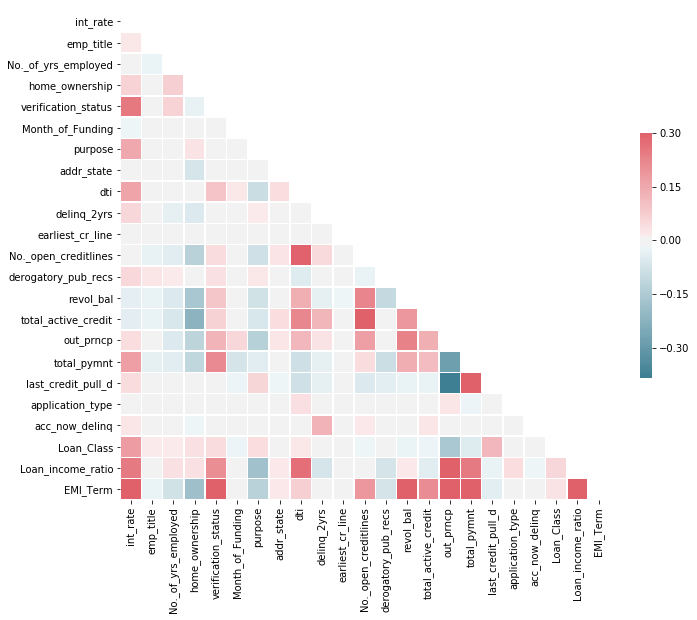

In [93]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [94]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=44)

In [95]:
log= LogisticRegression()
log.fit(X_train, y_train)

y_pred= log.predict(X_test)

# Summary of the prediction
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy
print("Accuracy of the model is: ", accuracy_score(y_pred,y_test))

C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    243393
           1       0.94      0.49      0.64     20274

   micro avg       0.96      0.96      0.96    263667
   macro avg       0.95      0.74      0.81    263667
weighted avg       0.96      0.96      0.95    263667

[[242804    589]
 [ 10410   9864]]
Accuracy of the model is:  0.9582845028008814


In [97]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

10-fold cross validation average accuracy: 0.958


In [110]:
X_train.columns

Index(['int_rate', 'emp_title', 'No._of_yrs_employed', 'home_ownership',
       'verification_status', 'Month_of_Funding', 'purpose', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'No._open_creditlines',
       'derogatory_pub_recs', 'revol_bal', 'total_active_credit', 'out_prncp',
       'total_pymnt', 'last_credit_pull_d', 'application_type',
       'acc_now_delinq', 'Loan_income_ratio', 'EMI_Term'],
      dtype='object')

In [114]:
Data_F1 = pd.DataFrame(['int_rate', 'emp_title', 'No._of_yrs_employed', 'home_ownership',
       'verification_status', 'Month_of_Funding', 'purpose', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'No._open_creditlines',
       'derogatory_pub_recs', 'revol_bal', 'total_active_credit', 'out_prncp',
       'total_pymnt', 'last_credit_pull_d', 'application_type',
       'acc_now_delinq', 'Loan_income_ratio', 'EMI_Term'])
Hal = pd.DataFrame(log.coef_)
Hal = Hal.transpose()

In [115]:
data= pd.concat([Data_F1, Hal],axis=1,ignore_index=True)
data = data.rename(columns={0: 'Feature', 1: 'Coeff_value'})
data.head(42)

,Feature,Coeff_value
0,int_rate,-6.847515e-03
1,emp_title,-2.211100e-06
2,No._of_yrs_employed,-2.421029e-03
3,home_ownership,-1.809220e-03
4,verification_status,-3.459317e-04
5,Month_of_Funding,-6.923013e-03
6,purpose,-2.217201e-03
7,addr_state,-1.052884e-02
8,dti,-8.234101e-03
9,delinq_2yrs,-8.193229e-05


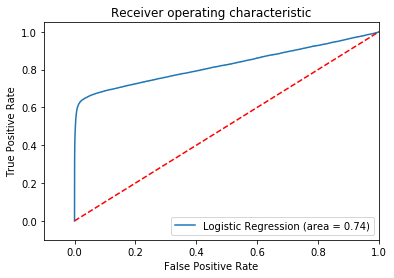

In [102]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc = roc_auc_score(y_test, log.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [96]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=40, random_state=21)
clf_rf.fit(X_train, y_train)

y_pred= clf_rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy
print("Accuracy of the model is: ", accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    243393
           1       0.99      0.58      0.73     20274

   micro avg       0.97      0.97      0.97    263667
   macro avg       0.98      0.79      0.86    263667
weighted avg       0.97      0.97      0.96    263667

[[243264    129]
 [  8546  11728]]
Accuracy of the model is:  0.9670986509498724


In [98]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV1 = RandomForestClassifier(n_estimators=40, random_state=21)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV1, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.967


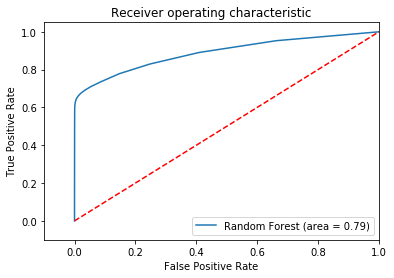

In [100]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_roc_auc = roc_auc_score(y_test, clf_rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [140]:
ra = ra.transpose()

In [155]:
X_test.iloc[0]

int_rate                     8.1900
emp_title               104652.0000
No._of_yrs_employed         10.0000
home_ownership               1.0000
verification_status          1.0000
Month_of_Funding            83.0000
purpose                      9.0000
addr_state                  36.0000
dti                         28.1500
delinq_2yrs                  0.0000
earliest_cr_line             7.0000
No._open_creditlines        14.0000
derogatory_pub_recs          0.0000
revol_bal                10860.0000
total_active_credit         24.0000
out_prncp                    0.0000
total_pymnt               2510.3600
last_credit_pull_d           1.0000
application_type             0.0000
acc_now_delinq               0.0000
Loan_income_ratio            0.2331
EMI_Term                  9050.4000
Name: 246053, dtype: float64

In [143]:
ra = list(ra)

In [146]:
ra = np.array(ra)

In [149]:
ra = np.transpose(ra)

In [151]:
ra = np.reshape(ra,(1,22))

In [166]:
ha = np.array([[10.19000000e+00, 1.04652000e+05, 1.00000000e+01, 0.00000000e+00,
        1.00000000e+00, 8.30000000e+01, 9.00000000e+00, 3.60000000e+01,
        2.81500000e+01, 0.00000000e+00, 7.00000000e+00, 1.40000000e+01,
        0.00000000e+00, 5.08600000e+04, 2.40000000e+01, 0.00000000e+00,
        2.51036000e+03, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.3100233e-01, 9.05040000e+03]])

In [153]:
ra.shape

(1, 22)

In [167]:
clf_rf.predict(ha)

array([1])

In [168]:
import pickle
import requests
import json
pickle.dump(log,open("log.pkl","wb"))
pickle.dump(clf_rf,open("Randfor.pkl","wb"))